In [4]:
import pandas as pd

# Load the stock price data from CSV into a pandas DataFrame
# Make sure your CSV file contains OHLCV columns: Open, High, Low, Close, Volume
df_stock = pd.read_csv('../datas/AAPL_historical_data.csv')

# Display the first few rows to verify the data loaded correctly
print(df_stock.head())

# Print summary info about the DataFrame: number of entries, data types, and non-null counts
print(df_stock.info())

# Verify that all required columns are present in the dataset
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
if not all(col in df_stock.columns for col in required_cols):
    raise ValueError(f"Missing one or more required columns: {required_cols}")

# Convert 'Date' column to datetime format for time series analysis (if 'Date' exists)
if 'Date' in df_stock.columns:
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    # Set 'Date' as the DataFrame index for easier resampling and time-based operations
    df_stock.set_index('Date', inplace=True)

# Display basic descriptive statistics to understand data distribution
print(df_stock.describe())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non

In [5]:
import pandas as pd
import ta

# Load your stock price data into a pandas DataFrame
# The data should include columns like Open, High, Low, Close, and Volume

df = pd.read_csv('../datas/AAPL_historical_data.csv')

# Calculate the 20-day Simple Moving Average (SMA) of the Close prices
# SMA smooths out short-term fluctuations to highlight the longer-term trend
df['SMA_20'] = ta.trend.SMAIndicator(df['Close'], window=20).sma_indicator()

# Calculate the 14-day Relative Strength Index (RSI)
# RSI measures the speed and change of price movements to identify overbought or oversold conditions
# RSI values range from 0 to 100; above 70 may indicate overbought, below 30 oversold
df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

# Calculate the Moving Average Convergence Divergence (MACD) indicators
# MACD is the difference between a fast (12-day) and slow (26-day) EMA
# MACD_signal is the 9-day EMA of the MACD line and acts as a signal for buy/sell
# MACD_hist is the difference between MACD and MACD_signal, showing momentum
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['MACD_hist'] = macd.macd_diff()

# Display the first few rows of the DataFrame including the new indicators
print(df.head(100))

          Date      Open      High       Low     Close  Adj Close     Volume  \
0   1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1   1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2   1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3   1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4   1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
..         ...       ...       ...       ...       ...        ...        ...   
95  1981-04-30  0.126674  0.127790  0.126674  0.126674   0.097653   12611200   
96  1981-05-01  0.126674  0.127790  0.126674  0.126674   0.097653   16553600   
97  1981-05-04  0.126674  0.126674  0.126116  0.126116   0.097223   14448000   
98  1981-05-05  0.126116  0.126116  0.125558  0.125558   0.096792   17539200   
99  1981-05-06  0.122768  0.122768  0.122210  0.122210   0.094211   18950400   

    Dividends  Stock Splits    SMA_20  

               Open    High     Low   Close    Volume
Date                                                 
2025-05-30  199.370  201.96  196.78  200.85  70819942
2025-05-29  203.575  203.81  198.51  199.95  51477938
2025-05-28  200.590  202.73  199.90  200.42  45339678
2025-05-27  198.300  200.74  197.43  200.21  56288475
2025-05-23  193.665  197.70  193.46  195.27  78432918
Volatility: 0.0189


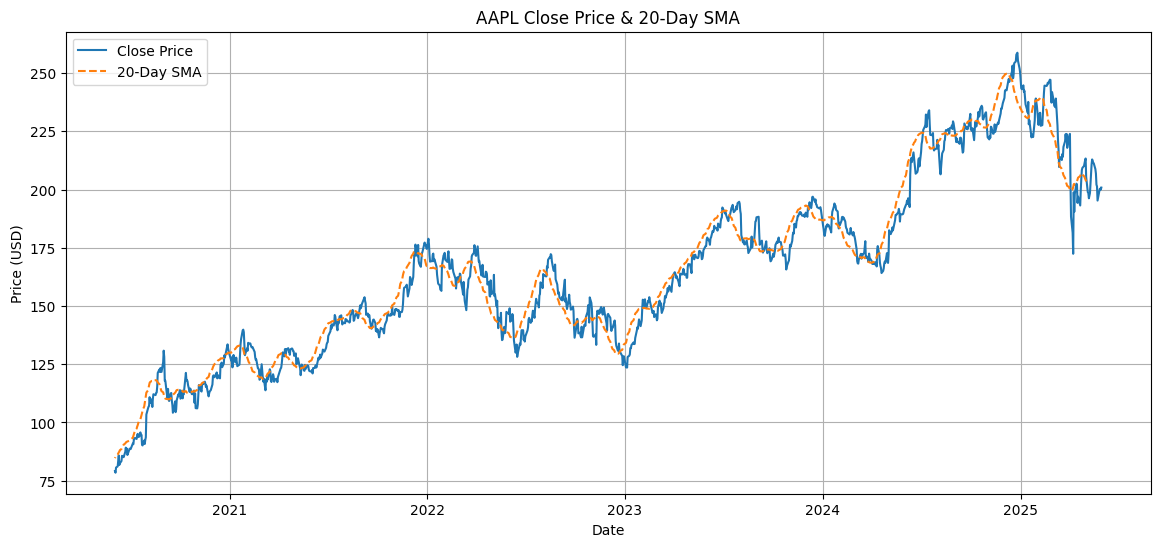

In [4]:
# Import required libraries
import pynance as pn                # Library for retrieving stock data
import pandas as pd                # For handling and manipulating data
import matplotlib.pyplot as plt    # For plotting charts

# ----------------------------------------------------------
# STEP 1: Load Historical Stock Data
# ----------------------------------------------------------

# Retrieve historical price data for Apple Inc. (AAPL)
# You can change the symbol to another stock like 'MSFT', 'GOOGL', etc.
data = pn.data.get('AAPL')

# View the first few rows of the data to see its structure
print(data.head())

# ----------------------------------------------------------
# STEP 2: Calculate Daily Returns
# ----------------------------------------------------------

# Daily return is calculated as the percentage change in closing price
# This shows how much the price changes day-to-day
data['Daily Return'] = data['Close'].pct_change()

# ----------------------------------------------------------
# STEP 3: Calculate Volatility
# ----------------------------------------------------------

# Volatility is the standard deviation of daily returns
# It tells us how "risky" or "unstable" a stock is
volatility = data['Daily Return'].std()
print(f"Volatility: {volatility:.4f}")

# ----------------------------------------------------------
# STEP 4: Calculate Cumulative Return
# ----------------------------------------------------------

# Cumulative Return shows total gain/loss over time if you had held the stock
# It multiplies the daily returns cumulatively
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# ----------------------------------------------------------
# STEP 5: Calculate Simple Moving Average (SMA)
# ----------------------------------------------------------

# A 20-day Simple Moving Average (SMA) smooths price data
# It helps reveal trends by averaging prices over 20 days
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# ----------------------------------------------------------
# STEP 6: Plot the Results
# ----------------------------------------------------------

# Set up the chart
plt.figure(figsize=(14, 6))

# Plot the closing price
plt.plot(data['Close'], label='Close Price')

# Plot the 20-day SMA
plt.plot(data['SMA_20'], label='20-Day SMA', linestyle='--')

# Add titles and labels
plt.title('AAPL Close Price & 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


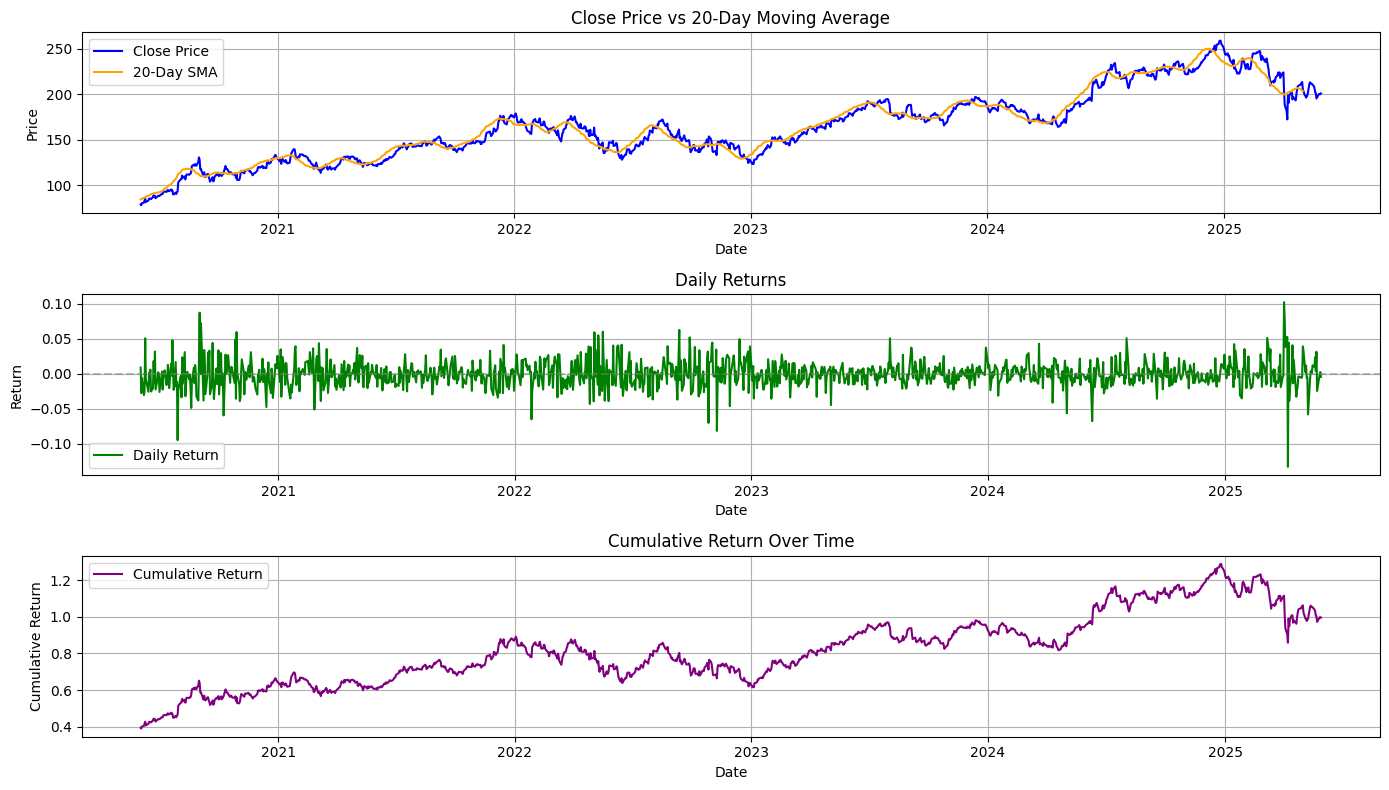

In [5]:
# Import required libraries
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots show inline (for Jupyter Notebooks)
# %matplotlib inline

# ----------------------------------------------------------
# STEP 1: Load Historical Stock Data
# ----------------------------------------------------------
# Fetch data for Apple (AAPL)
data = pn.data.get('AAPL')

# Convert index to datetime (if not already)
data.index = pd.to_datetime(data.index)

# ----------------------------------------------------------
# STEP 2: Calculate Financial Metrics
# ----------------------------------------------------------

# Daily return = percent change in 'Close' price
data['Daily Return'] = data['Close'].pct_change()

# Cumulative return = total gain/loss over time
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# 20-day Simple Moving Average (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# ----------------------------------------------------------
# STEP 3: Visualize the Data
# ----------------------------------------------------------

# Set the figure size for better visibility
plt.figure(figsize=(14, 8))

# -----------------------------
# Plot 1: Close Price & SMA
# -----------------------------
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Close Price vs 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# -----------------------------
# Plot 2: Daily Returns
# -----------------------------
plt.subplot(3, 1, 2)
plt.plot(data['Daily Return'], label='Daily Return', color='green')
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

# -----------------------------
# Plot 3: Cumulative Returns
# -----------------------------
plt.subplot(3, 1, 3)
plt.plot(data['Cumulative Return'], label='Cumulative Return', color='purple')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Adjust spacing and show the full chart
plt.tight_layout()
plt.show()
